Build the Image classification model by dividing the model into following 4 stages:

a. Loading and preprocessing the image data

b. Defining the model’s architecture

c. Training the model

d. Estimating the model’s performance

In [1]:
import tensorflow as tf
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D


In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
input_shape=(28,28,1)

## Reshaping the data to comply with the input shape requirement of a Convolutional Neural Network (CNN

In [4]:
xtrain = xtrain.reshape(xtrain.shape[0], 28,28, 1)
xtest = xtest.reshape(xtest.shape[0], 28, 28,1)

xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

xtrain=xtrain/255
xtest=xtest/255

In [5]:
model=Sequential()

model.add(Conv2D(28,kernel_size=(3,3),input_shape=(28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())#Flattens the output from the previous layer to a 1D array

model.add(Dense(15,activation='relu'))

model.add(Dropout(0.3))
#Dropout is a regularization technique that helps prevent overfitting
#by randomly setting a fraction of input units to 0 at each update during training. 
#Here, it applies a dropout rate of 30%.

model.add(Dense(20,activation='softmax'))


#model architecture described by the provided code consists of 
#a single convolutional layer followed by max pooling, 
#flattening,
#two dense layers (with dropout regularization), 
#and a final output layer for classification.

In [6]:
model.summary()

#The summary will provide a clearer picture of the model's structure 
#and the number of parameters associated with each layer, 
#helping you understand the model's complexity and resource requirements.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 15)                70995     
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                320       
                                                        

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#configuring the model for training

In [8]:
model.fit(xtrain,ytrain,epochs=1)

#model.fit() function is used to train the compiled model with the given training data. 
#the model is trained for a specified number of epochs,

2023-11-06 10:07:27.538390: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 9s 4ms/step - loss: 0.6638 - accuracy: 0.7935


In [9]:
#function to assess the trained model's performance on the test data.

test_acc,test_loss=model.evaluate(xtest,ytest)
print('loss:',test_loss)
print('accuracy:',test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.1744 - accuracy: 0.9468
loss: 0.9467999935150146
accuracy: 0.17438814043998718


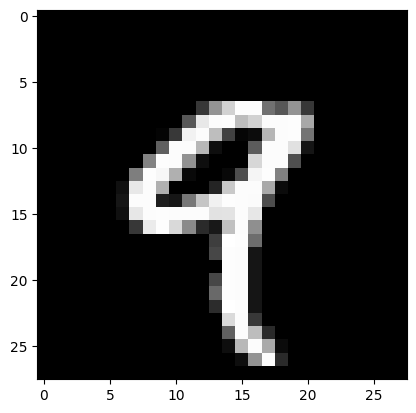

In [10]:
#visualizing an image from the training dataset (xtrain). 

image = xtrain[4]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [11]:
#using the trained model to make predictions on a single image.
#It takes the image from the training dataset, reshapes it to comply with the model's input shape, 
#and then uses the trained model to predict the class of the image.


image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
predict_model = model.predict([image])
print("Predicted class: {}".format(np.argmax(predict_model)))

1/1 [==============================] - 0s 69ms/step
Predicted class: 9
